# Automated Graph Producer for b-value

This is the program that produces a plot of our measured data and our two models: a model that states that the drag force is proportional to v, and a model that states that the drag force is proportional to v^2. 

It also provides the best b value of the model, and tells us which of the two models describe the measured data better by telling us its covariance. 

To run this program, there are three steps:

1. Input the trial data into 2 arrays: trial1velocity and trial1acceleration. They must correspond to each other, such that the first value of the velocity data corresponds to the first value of the acceleration data. Please make it a list of floats.
2. Go to the Graphing code, and change the mass value on Line 12 and Line 13 for each trial.
3. Run the main program:
    main("mass of object", trial1velocity, trial1acceleration)
4. The b value and the covariance will be printed out.

Graphing Code: Please change  the mass value on Line 12 and Line 13 when running a different experiment

In [46]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def g1(v,m,b):
    return -9.81+((b/m)*v)

def g2(v,m,b):
    return -9.81+((b/m)*v**2)

def g1curvefit(model,measuredvelocity, measuredacceleration):
    return optimize.curve_fit(lambda v, b: g1(v,0.035,b), measuredvelocity, measuredacceleration)

def g2curvefit(model,measuredvelocity, measuredacceleration):
    return optimize.curve_fit(lambda v, b: g2(v,0.035,b), measuredvelocity, measuredacceleration)

def main(MASS, vdata, adata):
    g1curvefit(lambda v, b:g1(v,MASS,b),vdata,adata)
    g2curvefit(lambda v, b:g2(v,MASS,b),vdata,adata)
    g1value= g1curvefit(lambda v, b:g1(v,MASS,b),vdata,adata)[0][0]
    g2value= g2curvefit(lambda v, b:g2(v,MASS,b),vdata,adata)[0][0]
    g1cov= g1curvefit(lambda v, b:g1(v,MASS,b),vdata,adata)[1][0]
    g2cov= g2curvefit(lambda v, b:g2(v,MASS,b),vdata,adata)[1][0]
    plt.figure(figsize=(7.5, 4.5))
    plt.title('Acceleration vs Velocity')
    plt.xlabel('Velocity m/s')
    plt.ylabel('Acceleration m/s^2')
    plt.scatter(vdata, adata,label='Measured Data')
    plt.plot(vdata, funcarray(g1,vdata,MASS, g1value),label='F_D prop to v model')
    plt.plot(vdata, funcarray(g2,vdata,MASS, g2value),label='F_D prop to v^2 model')
    plt.legend(loc='best')
    plt.show()
    print("b value and covariance for v model")
    print(g1value)
    print(g1cov)
    print("b value and covariance for v^2 model")
    print(g2value)
    print(g2cov)
    
    
def funcarray(FUNC,velocity,m,b):
    ARRAY=[]
    for i in range(len(velocity)):
        ARRAY.append(FUNC(velocity[i],m,b))
    return ARRAY        

def choosedata(table,start,end, value=0):
    a=table[0:value-1]+table[value:]
    return a[start:end]



DATA INPUT

In [47]:
vtable= [-2.064, -2.194, -2.319, -2.442, -2.557, -2.669, -2.779, -2.889, -3.007, -3.091, -3.137, -3.203, -3.278, -3.34, -3.398, -3.454, -3.479, -3.457, -3.351, -3.394, -3.722, -3.795, -3.242, -1.648, -2.06, -2.182, -2.302, -2.423, -2.531, -2.634, -2.735, -2.83, -2.92, -3.006, -3.088, -3.181, -3.231, -3.227, -3.264, -3.436, -3.545, -3.485, -3.363, -3.21, -3.452, -3.709, -3.305, -1.915, -2.006, -2.125, -2.247, -2.369, -2.482, -2.59, -2.691, -2.787, -2.879, -2.962, -3.039, -3.12, -3.19, -3.243, -3.272, -3.387, -3.542, -3.567, -3.535, -3.505, -3.538, -3.64, -3.375, -2.154, -1.903, -2.034, -2.16, -2.28, -2.405, -2.522, -2.627, -2.732, -2.832, -2.92, -3.005, -3.08, -3.156, -3.235, -3.321, -3.373, -3.392, -3.429, -3.459, -3.488, -3.534, -3.582, -3.53, -3.128, -1.62, -2.072, -2.196, -2.316, -2.435, -2.556, -2.665, -2.767, -2.868, -2.958, -3.035, -3.1, -3.176, -3.277, -3.333, -3.333, -3.412, -3.497, -3.508, -3.531, -3.561, -3.591, -3.569, -3.275, -2.211, -2.127, -2.248, -2.374, -2.497, -2.605, -2.708, -2.821, -2.946, -3.036, -3.079, -3.137, -3.209, -3.27, -3.315, -3.362, -3.419, -3.464, -3.495, -3.54, -3.598, -3.643, -3.549, -2.99, -1.902, -2.026, -2.145, -2.27, -2.399, -2.517, -2.627, -2.727, -2.825, -2.929, -3.041, -3.104, -3.139, -3.202, -3.262, -3.314, -3.359, -3.396, -3.43, -3.464, -3.502, -3.536, -3.552, -3.389, -2.665, -2.043, -2.162, -2.282, -2.403, -2.514, -2.631, -2.749, -2.872, -2.958, -3.004, -3.058, -3.116, -3.19, -3.258, -3.309, -3.36, -3.406, -3.439, -3.471, -3.506, -3.56, -3.603, -3.426, -2.665, -1.918, -2.041, -2.165, -2.292, -2.415, -2.531, -2.646, -2.755, -2.863, -2.964, -3.067, -3.117, -3.188, -3.283, -3.325, -3.371, -3.409, -3.448, -3.478, -3.501, -3.54, -3.566, -3.54, -3.272, -2.287, -1.987, -2.114, -2.231, -2.342, -2.463, -2.583, -2.692, -2.799, -2.905, -3.022, -3.106, -3.152, -3.217, -3.284, -3.351, -3.412, -3.473, -3.534, -3.551, -3.53, -3.394, -3.553, -3.793, -3.185, 0.411, 1.792, 2.41, 2.317, 2.036, 2.023, 1.811, 1.561, 1.49, 1.327, 1.186, 1.067, 0.947, 0.794, 0.65, 0.529, 0.386, 0.209, 0.028, -0.07, -0.147, -0.27, -0.411, -0.592, -0.726, -0.818, -0.83, -0.85, -1.029, -1.174, -1.285, -1.49, -1.726, -1.784, -1.513, -1.183, -1.841, -2.206, -1.042, 0.097, 0.334, 2.148, 2.633, 2.521, 2.227, 1.945, 1.663, 1.472, 1.546, 1.468, 1.353, 1.222, 1.086, 0.943, 0.801, 0.66, 0.523, 0.389, -0.13, 1.595, 2.387, 2.307, 2.022, 1.96, 1.789, 1.612, 1.502, 1.374, 1.237, 1.101, 0.969, 0.828, 0.686, 0.546, 0.408, 0.596, 1.997, 2.393, 2.356, 2.215, 2.074, 1.927, 1.771, 1.62, 1.487, 1.375, 1.307, 1.087, 0.868, 0.821, 0.694, 0.483, 0.336, -0.0, 1.794, 2.252, 2.244, 2.087, 1.93, 1.788, 1.646, 1.502, 1.364, 1.225, 1.089, 0.952, 0.813, 0.677, 0.545, 0.411, -1.104, 1.343, 2.541, 2.439, 1.829, 1.632, 1.746, 1.704, 1.599, 1.451, 1.313, 1.179, 1.15, 0.846, -0.496, 1.614, 2.216, 2.253, 2.11, 1.963, 1.804, 1.654, 1.52, 1.38, 1.24, 1.119, 1.023, 0.991, 0.785, 0.438, -0.489, 1.621, 2.252, 2.314, 2.205, 2.006, 1.812, 1.697, 1.564, 1.429, 1.291, 1.149, 1.009, 0.874, 0.737, 0.602, 0.471, 0.331, -0.061, 1.838, 2.345, 2.335, 2.139, 1.961, 1.801, 1.656, 1.514, 1.369, 1.226, 1.087, 0.95, 0.812, 0.674, 0.536, 0.398, 0.261, -0.979, 1.404, 2.307, 2.437, 2.176, 1.911, 1.81, 1.679, 1.55, 1.415, 1.273, 1.125, 0.986, 0.851, 0.712, 0.574, 0.432, 0.271]
atable= [-6.365, -6.333, -6.166, -5.947, -5.722, -5.586, -5.525, -5.417, -4.76, -3.633, -3.157, -3.338, -3.301, -3.019, -2.619, -1.6, 0.088, 1.399, -0.703, -5.72, -2.045, 18.5, 51.263, 77.46, -6.134, -6.057, -5.953, -5.685, -5.331, -5.098, -4.883, -4.645, -4.437, -4.253, -4.036, -3.179, -1.904, -2.123, -4.353, -4.771, -0.997, 2.965, 3.45, -1.71, -3.807, 12.368, 45.63, 78.34, -6.12, -6.048, -6.007, -5.827, -5.538, -5.241, -4.944, -4.668, -4.368, -4.073, -3.901, -3.605, -3.103, -2.842, -3.887, -5.208, -3.706, -0.769, 0.437, -0.108, 0.945, 12.392, 39.849, 70.599, -6.489, -6.383, -6.203, -6.1, -5.949, -5.599, -5.288, -5.055, -4.706, -4.341, -4.04, -3.883, -3.886, -3.82, -3.191, -2.109, -1.624, -1.615, -1.63, -1.777, -1.056, 4.101, 19.324, 48.978, 77.882, -6.267, -6.126, -5.997, -5.907, -5.69, -5.34, -5.043, -4.677, -4.186, -3.776, -3.743, -3.974, -3.458, -2.237, -2.362, -3.13, -2.343, -1.401, -1.263, -0.692, 2.766, 14.48, 39.378, 71.391, -6.199, -6.159, -6.084, -5.769, -5.47, -5.486, -5.575, -4.979, -3.678, -2.979, -3.11, -3.105, -2.741, -2.482, -2.498, -2.398, -2.093, -2.088, -2.216, -0.853, 6.233, 25.335, 59.859, -6.028, -6.11, -6.147, -6.223, -6.066, -5.701, -5.318, -5.089, -5.07, -4.974, -4.154, -2.979, -2.683, -2.85, -2.721, -2.422, -2.086, -1.844, -1.757, -1.758, -1.394, 0.753, 9.453, 30.869, 65.675, -6.096, -6.014, -5.963, -5.835, -5.786, -5.837, -5.703, -4.924, -3.603, -2.869, -2.907, -3.2, -3.31, -2.991, -2.633, -2.36, -1.997, -1.761, -1.812, -1.82, 0.048, 9.311, 31.637, 66.557, -6.065, -6.182, -6.224, -6.172, -5.984, -5.788, -5.604, -5.422, -5.173, -4.811, -4.003, -3.49, -3.727, -3.247, -2.477, -2.144, -1.904, -1.7, -1.476, -1.449, -0.83, 2.618, 13.681, 37.728, 70.753, -6.046, -6.028, -5.822, -5.828, -5.887, -5.712, -5.489, -5.377, -5.298, -4.715, -3.601, -3.098, -3.213, -3.271, -3.208, -3.035, -2.689, -1.522, 0.18, 1.44, -0.808, 0.015, 21.512, 63.752, 75.038, 48.833, 18.433, -1.76, -6.491, -7.249, -9.425, -8.089, -6.861, -7.058, -6.573, -6.371, -6.753, -7.062, -6.84, -7.018, -7.797, -8.076, -6.811, -5.297, -5.445, -6.515, -7.478, -7.169, -5.375, -3.242, -2.48, -4.75, -6.881, -7.106, -8.148, -8.725, -4.627, 3.177, 6.038, -4.912, -8.214, 20.047, 48.464, 54.6, 84.187, 54.905, 17.906, -4.075, -12.18, -12.93, -10.212, -4.671, -2.343, -4.253, -5.721, -6.558, -6.907, -7.049, -7.041, -6.94, -6.801, -6.685, 79.134, 57.552, 23.583, -0.381, -6.812, -7.033, -7.808, -7.117, -6.467, -6.588, -6.728, -6.76, -6.853, -6.995, -7.017, -6.939, -6.809, 76.385, 46.447, 16.37, -0.048, -5.783, -7.111, -7.476, -7.457, -6.923, -6.164, -5.721, -7.288, -8.898, -7.121, -6.042, -7.56, -7.802, -6.278, 81.165, 54.171, 20.074, 0.98, -6.072, -7.278, -7.21, -7.118, -7.028, -6.946, -6.896, -6.863, -6.877, -6.84, -6.739, -6.708, -6.769, 87.99, 75.657, 32.338, -3.733, -12.899, -5.418, -1.432, -3.302, -5.584, -6.583, -6.464, -6.041, -8.689, -11.697, 84.894, 62.023, 25.273, 3.316, -5.291, -7.282, -7.532, -7.188, -6.936, -6.807, -6.26, -5.361, -4.804, -7.119, -11.139, -10.372, 85.448, 62.827, 26.379, 4.21, -5.578, -8.438, -7.768, -6.77, -6.704, -6.813, -6.965, -6.991, -6.889, -6.807, -6.772, -6.737, -6.909, -7.296, 83.128, 56.843, 21.273, 0.527, -7.186, -8.2, -7.755, -7.325, -7.204, -7.159, -7.048, -6.939, -6.889, -6.885, -6.899, -6.897, -6.86, -6.81, 91.102, 72.792, 33.13, 4.34, -8.262, -8.778, -6.935, -6.576, -6.63, -6.918, -7.122, -7.093, -6.926, -6.885, -6.953, -7.103, -7.324, -7.068]
velocitydata1= vtable[0:20]
accelerationdata1= atable[0:20]

velocitydata2= vtable[50:65]
accelerationdata2= atable[50:65]

In [49]:
velocitydata3= vtable[50:65]
accelerationdata3= atable[50:65]
velocitydata3= vtable[75:85]
accelerationdata3= atable[75:85]

Running Main Program

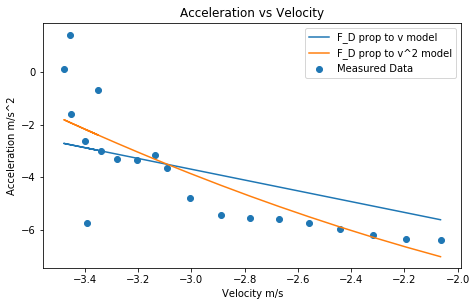

b value and covariance for v model
-0.07138780822083973
[1.85104433e-05]
b value and covariance for v^2 model
0.023109903308687767
[1.25927024e-06]


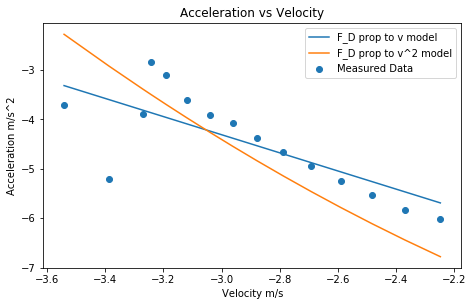

b value and covariance for v model
-0.06419112718270543
[3.59426708e-06]
b value and covariance for v^2 model
0.021020543907740684
[8.11497138e-07]


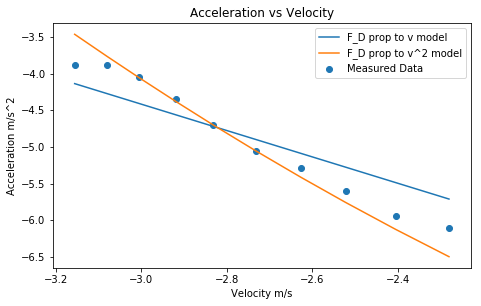

b value and covariance for v model
-0.0629236053619662
[1.65424008e-06]
b value and covariance for v^2 model
0.022302701482660635
[9.41864831e-08]


In [50]:
main(0.035,velocitydata1,accelerationdata1)
main(0.035,velocitydata2,accelerationdata2)
main(0.035,velocitydata3,accelerationdata3)